In [1]:
import pickle
from load_data import *
from matplotlib import pyplot as plt
from transformers import AutoTokenizer

/opt/conda/envs/klue/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open('dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)

In [3]:
print(dict_label_to_num)

{'no_relation': 0, 'org:top_members/employees': 1, 'org:members': 2, 'org:product': 3, 'per:title': 4, 'org:alternate_names': 5, 'per:employee_of': 6, 'org:place_of_headquarters': 7, 'per:product': 8, 'org:number_of_employees/members': 9, 'per:children': 10, 'per:place_of_residence': 11, 'per:alternate_names': 12, 'per:other_family': 13, 'per:colleagues': 14, 'per:origin': 15, 'per:siblings': 16, 'per:spouse': 17, 'org:founded': 18, 'org:political/religious_affiliation': 19, 'org:member_of': 20, 'per:parents': 21, 'org:dissolved': 22, 'per:schools_attended': 23, 'per:date_of_death': 24, 'per:date_of_birth': 25, 'per:place_of_birth': 26, 'per:place_of_death': 27, 'org:founded_by': 28, 'per:religion': 29}


In [4]:
with open('dict_num_to_label.pkl', 'rb') as f:
    dict_num_to_label = pickle.load(f)

In [5]:
print(dict_num_to_label)

{0: 'no_relation', 1: 'org:top_members/employees', 2: 'org:members', 3: 'org:product', 4: 'per:title', 5: 'org:alternate_names', 6: 'per:employee_of', 7: 'org:place_of_headquarters', 8: 'per:product', 9: 'org:number_of_employees/members', 10: 'per:children', 11: 'per:place_of_residence', 12: 'per:alternate_names', 13: 'per:other_family', 14: 'per:colleagues', 15: 'per:origin', 16: 'per:siblings', 17: 'per:spouse', 18: 'org:founded', 19: 'org:political/religious_affiliation', 20: 'org:member_of', 21: 'per:parents', 22: 'org:dissolved', 23: 'per:schools_attended', 24: 'per:date_of_death', 25: 'per:date_of_birth', 26: 'per:place_of_birth', 27: 'per:place_of_death', 28: 'org:founded_by', 29: 'per:religion'}


In [6]:
def label_to_num(label):
  num_label = []
  with open('dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)
  for v in label:
    num_label.append(dict_label_to_num[v])
  
  return num_label

In [7]:
train_dataset = load_data("../dataset/train/train.csv")
train_label = label_to_num(train_dataset['label'].values)

In [8]:
print(train_dataset[:10])

   id                                           sentence subject_entity  \
0   0  〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...          '비틀즈'   
1   1  호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...        '민주평화당'   
2   2  K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...         '광주FC'   
3   3  균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...        '아성다이소'   
4   4  1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...    '요미우리 자이언츠'   
5   5  : 유엔, 유럽 의회, 북대서양 조약 기구 (NATO), 국제이주기구, 세계 보건 ...   '북대서양 조약 기구'   
6   6  그에 따라 나폴리와 계약을 연장한 마라도나는 1989년 팀을 UEFA컵 정상으로 인...        'AC 밀란'   
7   7  박용오(朴容旿, 1937년 4월 29일(음력 3월 19일)(음력 3월 19일) ~ ...          '박용오'   
8   8  중공군에게 온전히 대항할 수 없을 정도로 약해진 국민당은 타이베이로 수도를 옮기는 ...         '중화민국'   
9   9  특히 김동연 전 경제부총리를 비롯한 김두관 국회의원, 안규백 국회의원, 김종민 국회...          '안규백'   

     object_entity                      label  
0         '조지 해리슨'                no_relation  
1           '대안신당'                no_relation  
2       '한국프로축구연맹'            

학습 문장 최대 길이 : 455
학습 문장의 평균 길이 : 97.08395441946412
32470


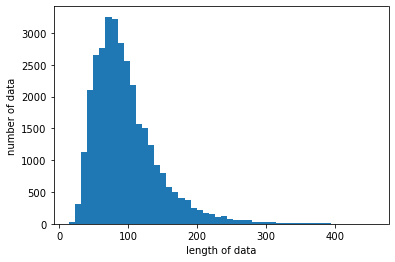

In [9]:
#학습 문장의 길이조사
print('학습 문장 최대 길이 :',max(len(l) for l in train_dataset['sentence']))
print('학습 문장의 평균 길이 :',sum(map(len, train_dataset['sentence']))/len(train_dataset['sentence']))
print(len(train_dataset['sentence']))
plt.hist([len(s) for s in train_dataset['sentence']], bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

In [10]:
MODEL_NAME = "klue/roberta-large"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
tokenized_train = tokenized_dataset(train_dataset, tokenizer)

In [12]:
tokenizer.convert_tokens_to_ids('[UNK]')

3

In [13]:
print(len(tokenized_train.input_ids))

32470


토큰화된 학습 문장 최대 길이 : 241
토큰화된 학습 문장의 평균 길이 : 64.5516784724361
32470


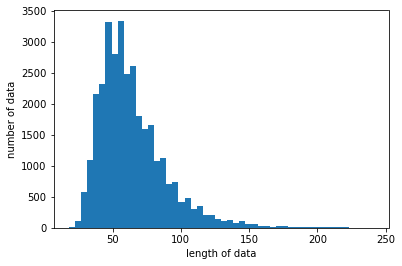

In [14]:
#토큰화된 학습 문장의 길이조사
print('토큰화된 학습 문장 최대 길이 :',max(sum(l).numpy() for l in tokenized_train.attention_mask))
print('토큰화된 학습 문장의 평균 길이 :',sum(sum(l).numpy() for l in tokenized_train.attention_mask)/len(tokenized_train.attention_mask))
print(len(tokenized_train.attention_mask))
values = [int(sum(l).numpy()) for l in tokenized_train.attention_mask]
plt.hist(values, bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

In [15]:
# train 데이터셋에서 UNK 토큰이 있나 확인함(0.3317%)
print(f"총 문장 개수 : {len(tokenized_train.input_ids)}")
cnt = sum(sum((tokenized_train.input_ids == 3))).numpy()
total_words = sum(sum(tokenized_train.attention_mask)).numpy()

print(f"[UNK] 토큰 개수 : {cnt}")
print(f"전체 토큰 개수(PAD제외) : {total_words}")
print(f"[UNK] 비율 : {cnt / total_words * 100}%")

총 문장 개수 : 32470
[UNK] 토큰 개수 : 6953
전체 토큰 개수(PAD제외) : 2095993
[UNK] 비율 : 0.3317282071075619%


In [16]:
test_dataset = load_data("../dataset/test/test_data.csv")
tokenized_test = tokenized_dataset(test_dataset, tokenizer)

In [17]:
print(test_dataset[:10])

   id                                           sentence  subject_entity  \
0   0               지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.           'MBC'   
1   1  사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이...       '프린세스 프링'   
2   2  한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으...            '경찰'   
3   3  정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하...            '세조'   
4   4  당시 민주당 이진련 시의원은 권영진 시장에게 "긴급 생계자금을 왜 현금으로 지원하지...           '민주당'   
5   5  미국은 필리핀 측에서는 동맹이 아니라 지배자가 되었다고 볼 수 있기 때문에, 필리핀...           '필리핀'   
6   6  한국당 전희경 대변인은 이날 정 총리 후보자 지명 직후 논평을 내고 "의회를 시녀화...           '전희경'   
7   7  문재인 대통령 부인 김정숙 여사는 22일부터 1박2일 일정으로 광주를 방문해 경기를...           '문재인'   
8   8  조선민주주의인민공화국 관할 지역은 개풍군 영북면 월고리 및 연천군 서남면 지역을 합...   '조선민주주의인민공화국'   
9   9         소련군에서 그의 이름도 중국식의 진지첸으로 조선인으로서의 정체성도 희박했다.           '소련군'   

   object_entity  label  
0   '탐사기획 스트레이트'    100  
1           '공주'    100  
2        '1995년'    100  
3          '정창손'    100  
4          '권영진'    100  
5      

테스트 문장 최대 길이 : 432
테스트 문장의 평균 길이 : 92.96497102382486
7765


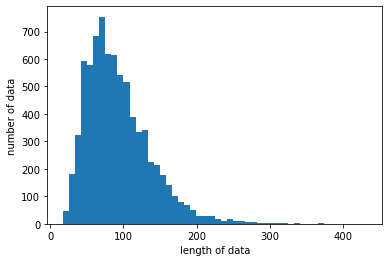

In [18]:
#테스트 문장의 길이조사
print('테스트 문장 최대 길이 :',max(len(l) for l in test_dataset['sentence']))
print('테스트 문장의 평균 길이 :',sum(map(len, test_dataset['sentence']))/len(test_dataset['sentence']))
print(len(test_dataset['sentence']))
plt.hist([len(s) for s in test_dataset['sentence']], bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

토큰화된 테스트 문장 최대 길이 : 235
토큰화된 테스트 문장의 평균 길이 : 61.47482292337411
7765


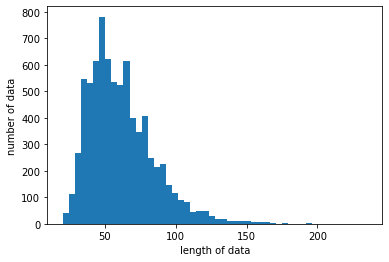

In [19]:
#토큰화된 테스트 문장의 길이조사
print('토큰화된 테스트 문장 최대 길이 :',max(sum(l).numpy() for l in tokenized_test.attention_mask))
print('토큰화된 테스트 문장의 평균 길이 :',sum(sum(l).numpy() for l in tokenized_test.attention_mask)/len(tokenized_test.attention_mask))
print(len(tokenized_test.attention_mask))
values = [int(sum(l).numpy()) for l in tokenized_test.attention_mask]
plt.hist(values, bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

In [20]:
# test 데이터셋에서 UNK 토큰이 있나 확인함(0.2202%)
print(f"총 문장 개수 : {len(tokenized_test.input_ids)}")
cnt = sum(sum((tokenized_test.input_ids == 3))).numpy()
total_words = sum(sum(tokenized_test.attention_mask)).numpy()

print(f"[UNK] 토큰 개수 : {cnt}")
print(f"전체 토큰 개수(PAD제외) : {total_words}")
print(f"[UNK] 비율 : {cnt / total_words * 100}%")

총 문장 개수 : 7765
[UNK] 토큰 개수 : 1051
전체 토큰 개수(PAD제외) : 477352
[UNK] 비율 : 0.2201729541302854%
